In [8]:
import pandas as pd
import numpy as np
import env
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = wrangle.get_zillow_data()

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertylandusetypeid,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,transactiondate
0,3.0,3.0,1534.0,6037.0,33981374.0,-118317057.0,247.0,3101.0,96028.0,1940.0,43439.0,756.94,2017-06-08
1,2.0,3.0,1125.0,6059.0,33922098.0,-117954970.0,266.0,1286.0,96186.0,1974.0,289445.0,3490.16,2017-08-04
2,2.0,3.0,1316.0,6037.0,34033180.0,-118355396.0,261.0,3101.0,95997.0,1923.0,205123.0,2627.48,2017-07-21
3,2.0,3.0,1458.0,6037.0,34686163.0,-118113100.0,261.0,3101.0,97318.0,1970.0,136104.0,2319.90,2017-06-23
4,2.0,3.0,1766.0,6037.0,34073222.0,-118390965.0,266.0,3101.0,96086.0,1980.0,810694.0,9407.01,2017-07-28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41369 entries, 0 to 41368
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   41353 non-null  float64
 1   bedroomcnt                    41353 non-null  float64
 2   calculatedfinishedsquarefeet  41237 non-null  float64
 3   fips                          41353 non-null  float64
 4   latitude                      41353 non-null  float64
 5   longitude                     41353 non-null  float64
 6   propertylandusetypeid         41353 non-null  float64
 7   regionidcounty                41353 non-null  float64
 8   regionidzip                   41326 non-null  float64
 9   yearbuilt                     41194 non-null  float64
 10  taxvaluedollarcnt             41352 non-null  float64
 11  taxamount                     41352 non-null  float64
 12  transactiondate               41369 non-null  object 
dtypes

In [9]:
def split_zillow(df):
    train, test = train_test_split(df, train_size=0.8, random_state=123)
    train, validate = train_test_split(train, train_size=0.7, random_state=123)
    return train, validate, test

In [11]:
train, validate, test = split_zillow(df)

In [13]:
train.shape

(23166, 13)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23166 entries, 20128 to 18008
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   23159 non-null  float64
 1   bedroomcnt                    23159 non-null  float64
 2   calculatedfinishedsquarefeet  23093 non-null  float64
 3   fips                          23159 non-null  float64
 4   latitude                      23159 non-null  float64
 5   longitude                     23159 non-null  float64
 6   propertylandusetypeid         23159 non-null  float64
 7   regionidcounty                23159 non-null  float64
 8   regionidzip                   23144 non-null  float64
 9   yearbuilt                     23072 non-null  float64
 10  taxvaluedollarcnt             23158 non-null  float64
 11  taxamount                     23158 non-null  float64
 12  transactiondate               23166 non-null  object 
dt

In [15]:
# for col in df:
#     print(df[col].value_counts(dropna=False))
#     print('-----------')
    
# 

> These are the missing values
> - 34 in `bedroomcnt` 
> - 235 in `calculatedfinishedsquarefeet` 
> - 34 in `bathroomcnt`
> - 39 in `taxamount`
> - 34 in `fips`

## Exploration exercises

In [8]:
def plot_categorical_and_continuous_vars(df, cat_vars, cont_vars):
    for cat in cat_vars:
        for cont in cont_vars:
            # creates a boxplot
            sns.boxplot(x=cat, y=cont, data=df)
            plt.title('Distribution of ' + cont)
            plt.show()
            
            # creates a swarmplot
            sns.swarmplot(x=cat, y=cont, data=df)
            plt.show()
    
            # creates a stripplot
            sns.stripplot(x=cat, y=cont, data=df)
            plt.show()
            plt.tight_layout()

In [7]:
def plot_variable_pairs(df):
    new_df = df
    cols = new_df.columns.to_list()
    # show pairwise relationships
    sns.pairplot(new_df[cols], corner=True, kind="reg", plot_kws={'line_kws':{'color':'red'}})
    plt.show()

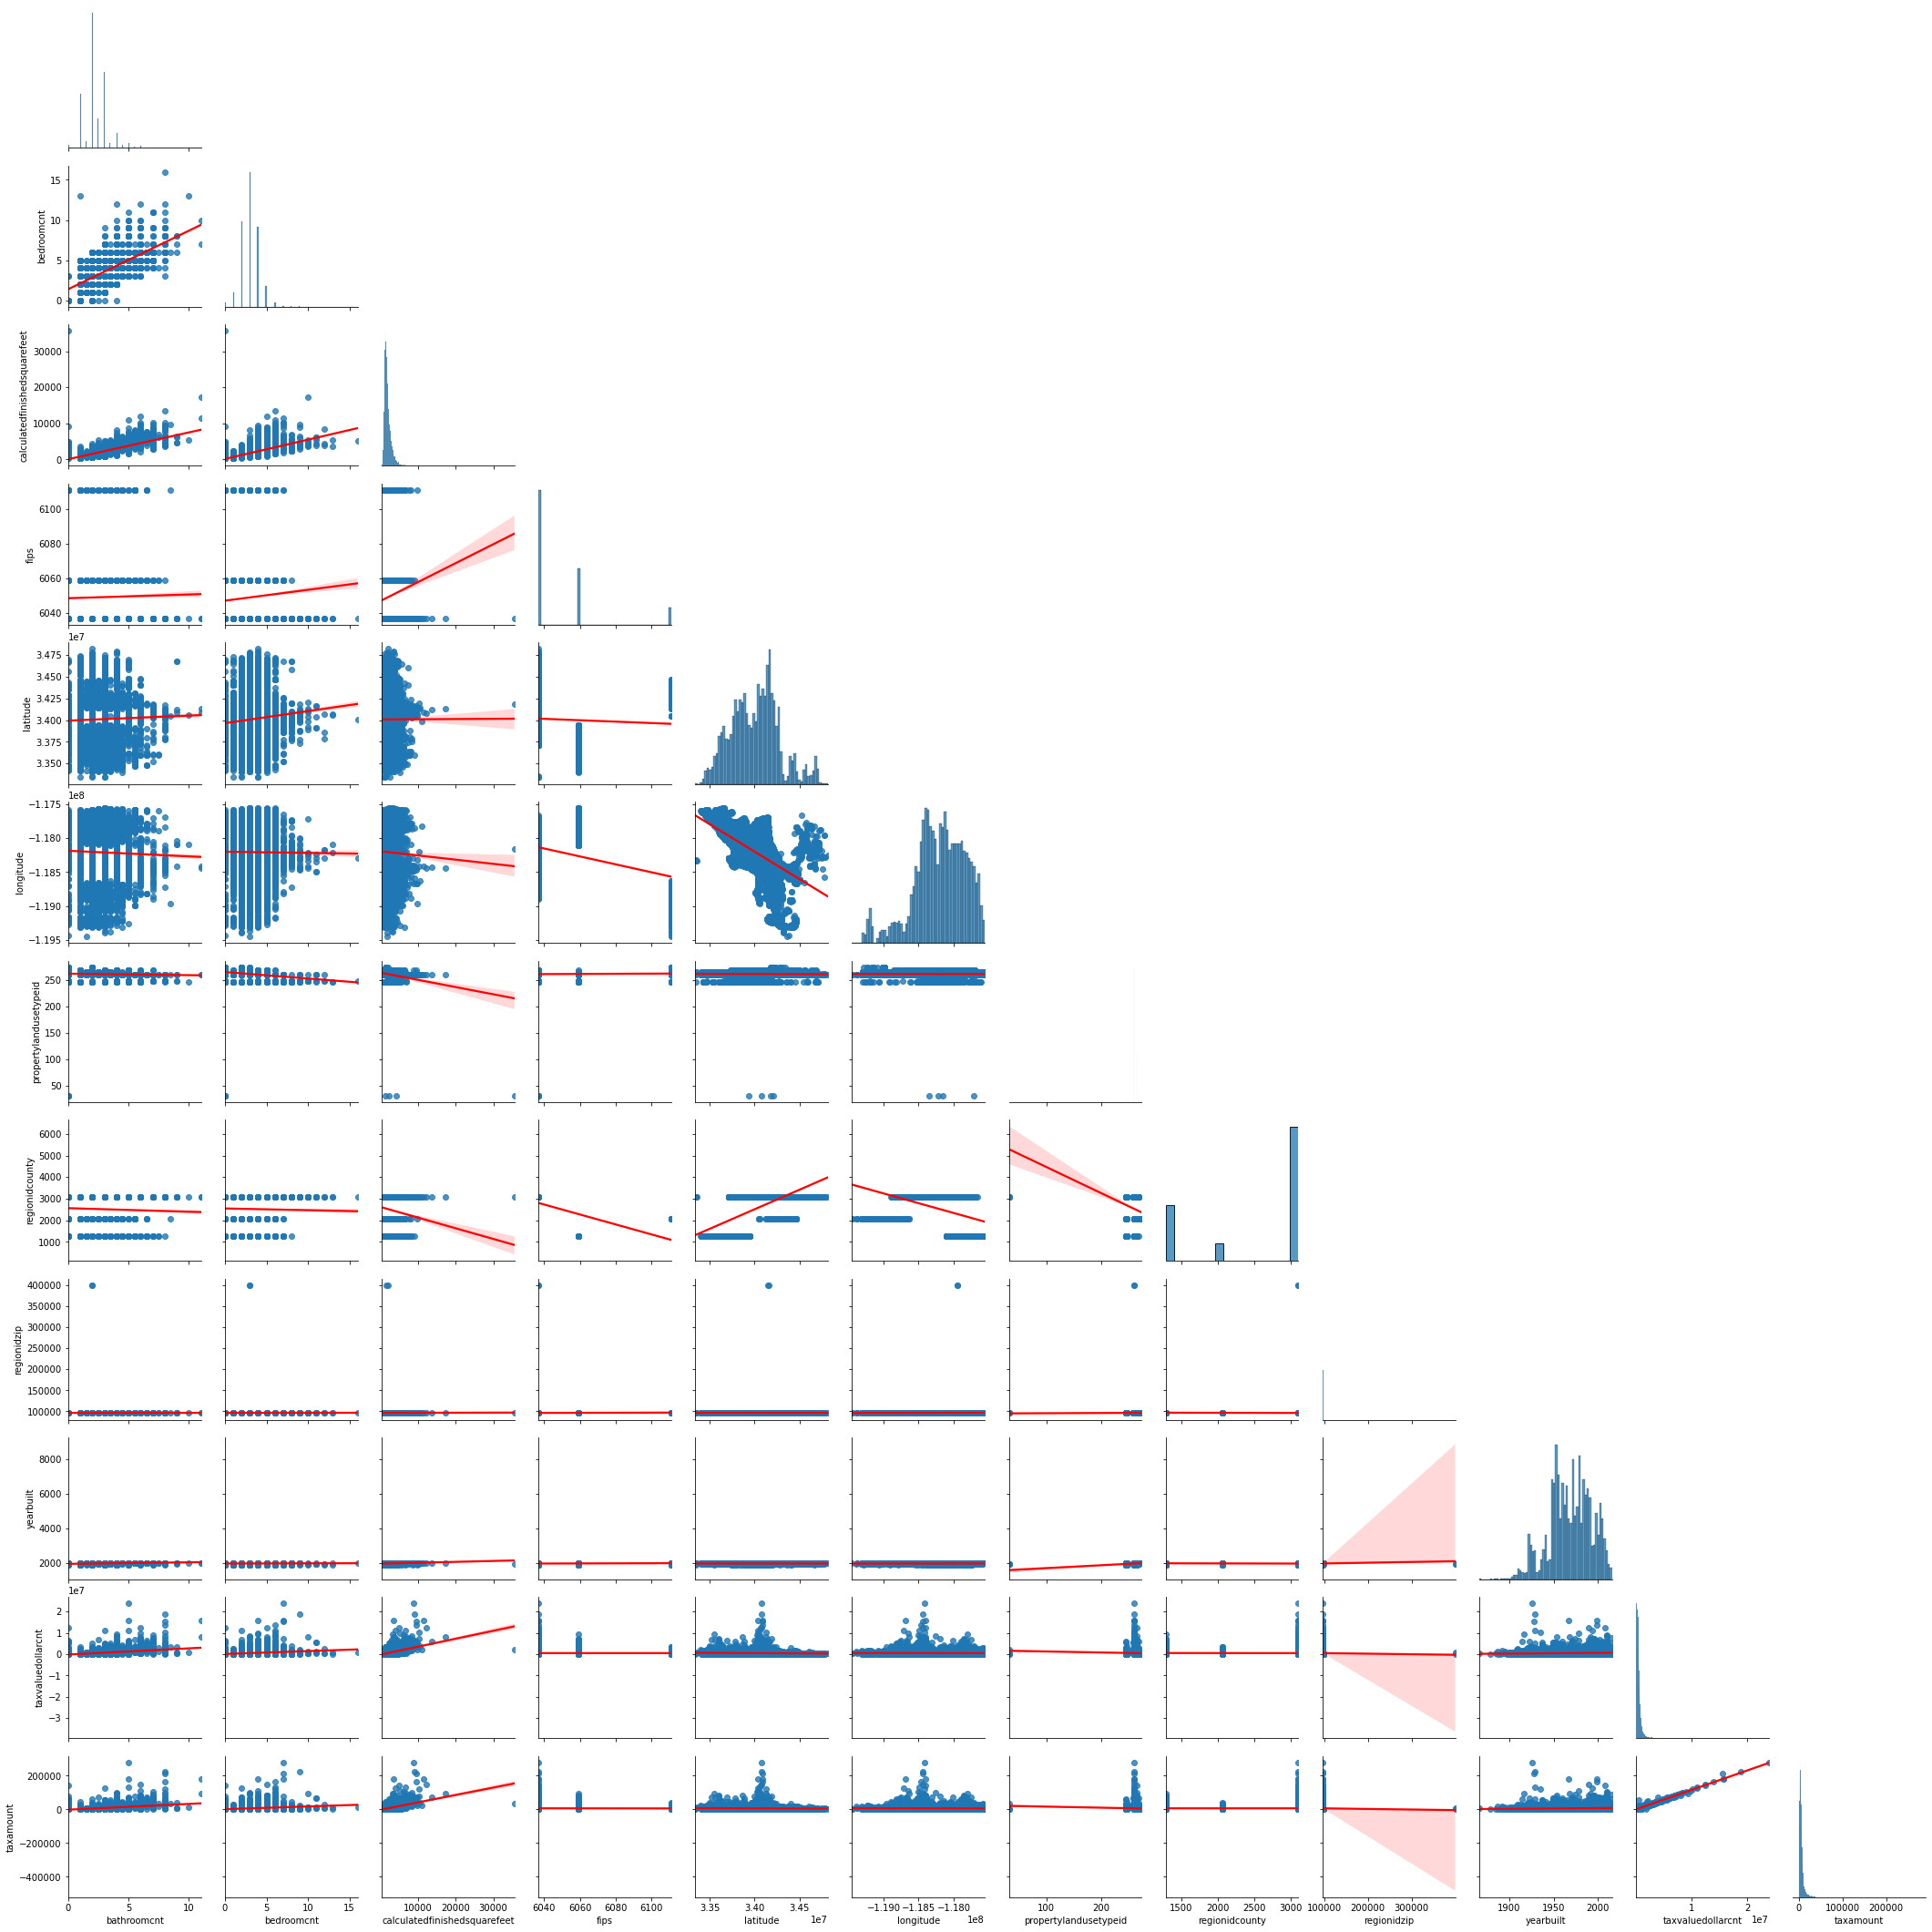

In [14]:
plot_variable_pairs(train)

In [16]:
train.columns

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips',
       'latitude', 'longitude', 'propertylandusetypeid', 'regionidcounty',
       'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount',
       'transactiondate'],
      dtype='object')

In [20]:
tv_corr = train.drop(columns=['fips','transactiondate', 'latitude', 'longitude']).corr()
tv_corr

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,propertylandusetypeid,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount
bathroomcnt,1.000000,0.638508,0.760208,-0.056697,-0.020461,0.001432,0.371208,0.465846,0.470988
bedroomcnt,0.638508,1.000000,0.621612,-0.281555,-0.011342,0.007445,0.053295,0.247919,0.256046
calculatedfinishedsquarefeet,0.760208,0.621612,1.000000,-0.264651,-0.059487,0.006494,0.214068,0.581209,0.586631
propertylandusetypeid,-0.056697,-0.281555,-0.264651,1.000000,-0.074731,0.009633,0.352998,-0.037467,-0.043433
regionidcounty,-0.020461,-0.011342,-0.059487,-0.074731,1.000000,-0.091584,-0.287695,-0.036245,-0.004468
regionidzip,0.001432,0.007445,0.006494,0.009633,-0.091584,1.000000,0.052133,-0.012242,-0.013807
yearbuilt,0.371208,0.053295,0.214068,0.352998,-0.287695,0.052133,1.000000,0.127419,0.132764
taxvaluedollarcnt,0.465846,0.247919,0.581209,-0.037467,-0.036245,-0.012242,0.127419,1.000000,0.989088
taxamount,0.470988,0.256046,0.586631,-0.043433,-0.004468,-0.013807,0.132764,0.989088,1.000000


<AxesSubplot:>

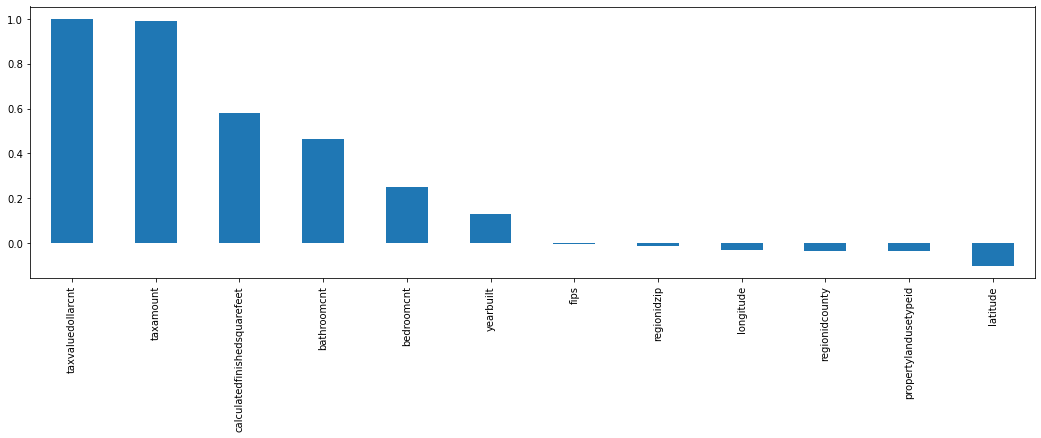

In [22]:
# check correlation of features with the target variable
train.corr().taxvaluedollarcnt.sort_values(ascending=False).plot(kind='bar', figsize=(18,5))

### features to include:
- bathroomcnt
- bedroomcnt
- calculatedfinishedsquarefeet
- taxamount
- yearbuilt